# Agglomerative Clutsering 
---
Agglomerative Clutsering是一种自底而上的层次聚类方法，它能够根据指定的相似度或距离定义计算出类之间的距离。Agglomerative Clutsering 是属于Hierarchical clustering两种方式的其中一种，另一种是divisive,自顶而下。

Dendrogram：依次将符合条件的类相连，最后得到使算法与数据均形象化的树状结构图。Dendrogram专门用来描述经层次聚类算法得到的结果。

## Agglomerative Clustering Algorithm
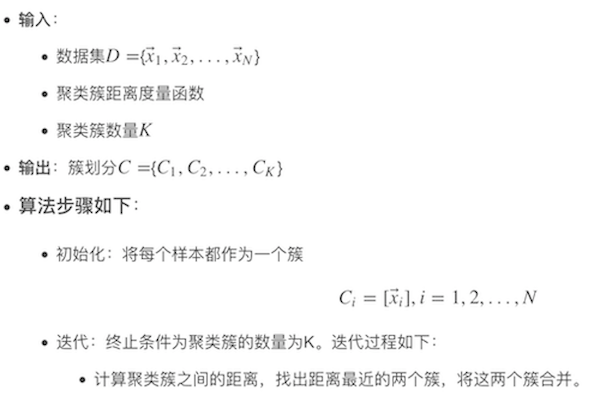

## Agglomerative Clustering的三种不同方法
依据对相似度（距离）的不同定义，将Agglomerative Clustering的聚类方法分为三种：Single-linkage,Complete-linkage和Group average.

- **Single-linkage**:
要比较的距离为元素对之间的最小距离
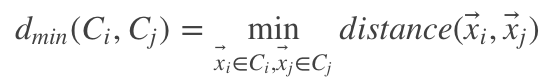


- **Complete-linkage**:
要比较的距离为元素对之间的最大距离
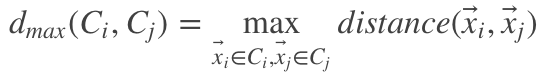


- **Group average**：
要比较的距离为类之间的平均距离（平均距离的定义与计算：假设有A，B两个类，A中有n个元素，B中有m个元素。在A与B中各取一个元素，可得到他们之间的距离。将nm个这样的距离相加，得到距离和。最后距离和除以nm得到A，B两个类的平均距离。）
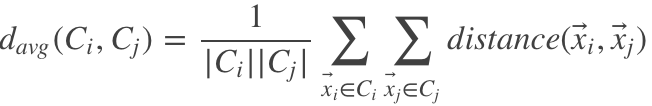


## 例子：
接下来用这三种不同的方法，对同一数据进行层次聚类。
单个元素之间距离表如下：
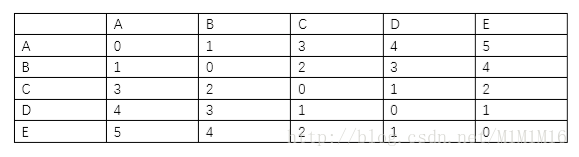

d为距离；k为类的个数；K为现有的具体的类
1. Single-linkage 每次取最短的最小距离
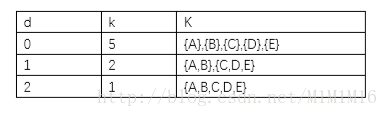

2.Complete-linkage 每次取最短的最大距离
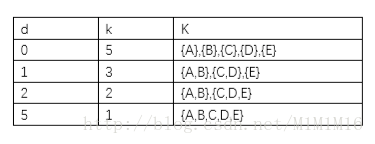

3.Group average 取最短的平均距离
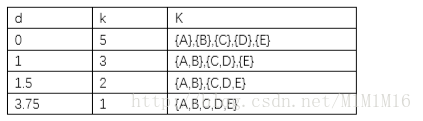


## 实现：AgglomerativeClustering

AgglomerativeClustering是scikit-learn提供的层级聚类算法模型  
```
sklearn.cluster.AgglomerativeClustering(n_clusters=2, 
                                        affinity=’euclidean’, 
                                        memory=None, 
                                        connectivity=None, 
                                        compute_full_tree=’auto’, 
                                        linkage=’ward’, 
                                        pooling_func=<function mean>)
```
   

**算法关键参数及特点**

__模型参数__

> 
- n_clusters：  一个整数，指定分类簇的数量
- connectivity：一个数组或者可调用对象或者None，用于指定连接矩阵
- affinity：    一个字符串或者可调用对象，用于计算距离。可以为：’euclidean’，’l1’，’l2’，’mantattan’，’cosine’，’precomputed’，如果linkage=’ward’，则affinity必须为’euclidean’
- memory：      用于缓存输出的结果，默认为不缓存
- n_components：在 v-0.18中移除
- compute_full_tree：通常当训练了n_clusters后，训练过程就会停止，但是如果compute_full_tree=True，则会继续训练从而生成一颗完整的树
- linkage：     一个字符串，用于指定链接算法
         ‘ward’：单链接single-linkage，采用dmin
         ‘complete’：全链接complete-linkage算法，采用dmax
         ‘average’：均连接average-linkage算法，采用davg
- pooling_func：一个可调用对象，它的输入是一组特征的值，输出是一个数

__模型属性__

> 
- labels：每个样本的簇标记
- n_leaves_：分层树的叶节点数量
- n_components：连接图中连通分量的估计值
- children：一个数组，给出了每个非节点数量


## Refer:
- https://blog.csdn.net/M1M1M16/article/details/79415871 
- https://blog.csdn.net/Haiyang_Duan/article/details/77995665


Python version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.1
matplotlib version: 2.0.2
numpy version: 1.12.1
scipy version: 0.19.0
IPython version: 5.3.0
sklearn version: 0.18.1

 Agglomerative clustering iteratively joins the two closet clusters


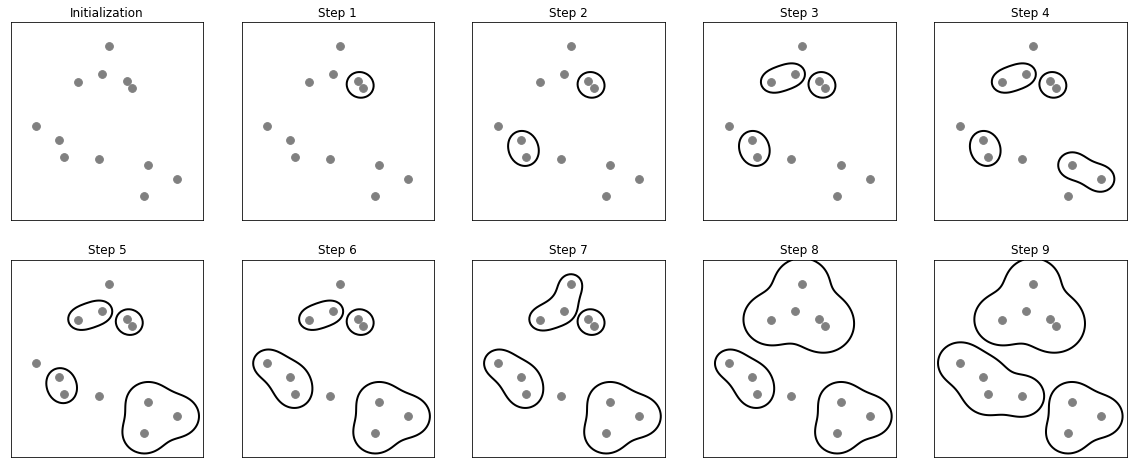

In [15]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
import matplotlib.pyplot as plt



print("\n Agglomerative clustering iteratively joins the two closet clusters")
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

AgglomerativeClustering:
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x10921b510>)

 Cluster assignment using agglomerative clustering with three clusters


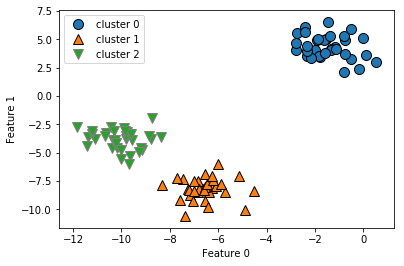

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# generate synhetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the cluster model
agg = AgglomerativeClustering(n_clusters = 3)
assigments = agg.fit_predict(X)

print("AgglomerativeClustering:\n{}".format(agg))
print("\n Cluster assignment using agglomerative clustering with three clusters")
mglearn.discrete_scatter(X[:, 0], X[:, 1], assigments)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Hierachical clustering and dendrograms

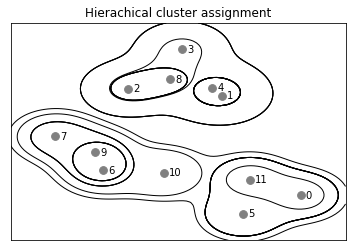

In [17]:
mglearn.plots.plot_agglomerative()
plt.title("Hierachical cluster assignment")
plt.show()

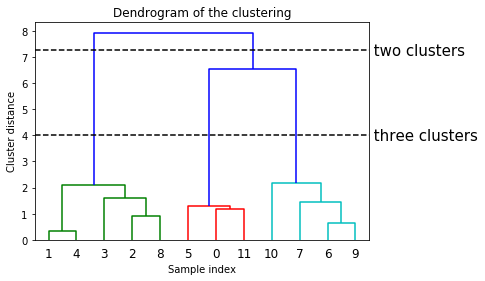

In [18]:
# Import the dendrogram function and the ward clustering function from Scipy
from scipy.cluster.hierarchy import dendrogram, ward

# generate synhetic two-dimensional data
X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The Scipy ward function returns an array that specifies the distance
# bridged when performing aggloerative clustering

linkage_array = ward(X)
# The default choice, ward picks the two clusters to merge such that the variance with all clusters increases the least. 
# It often leads to clusters that are relatively equally sized. 

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Dendrogram of the clustering")
plt.show()

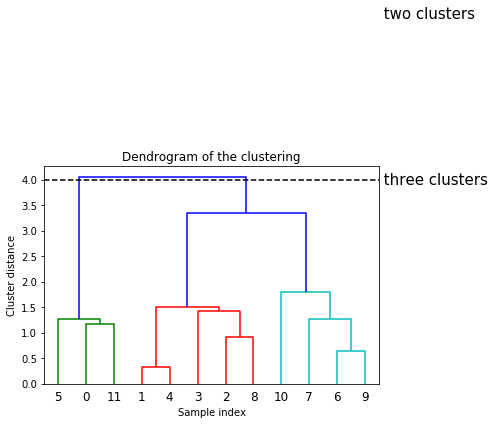

In [19]:
# Import the dendrogram function and the ward clustering function from Scipy
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

# generate synhetic two-dimensional data
X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The Scipy ward function returns an array that specifies the distance
# bridged when performing aggloerative clustering

linkage_array = average(X)
# average merge two clusters that have the smallest average distance between all their points 

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Dendrogram of the clustering")
plt.show()

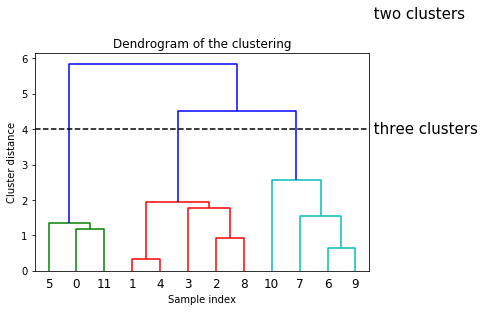

In [20]:
# Import the dendrogram function and the ward clustering function from Scipy
from scipy.cluster.hierarchy import dendrogram, ward

# generate synhetic two-dimensional data
X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The Scipy ward function returns an array that specifies the distance
# bridged when performing aggloerative clustering

linkage_array = complete(X)
# average merge two clusters that have the smallest maximum distance between their points 

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Dendrogram of the clustering")
plt.show()

## Example 1 

ARI:0.33266533066132264


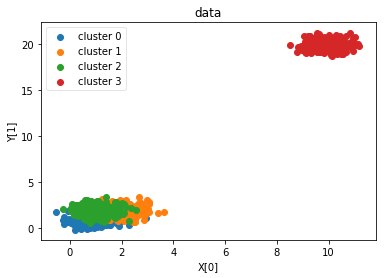

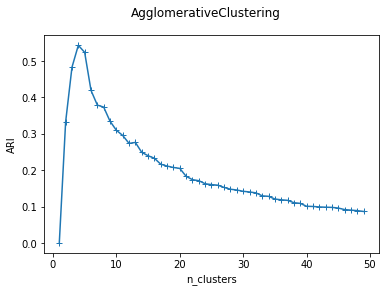

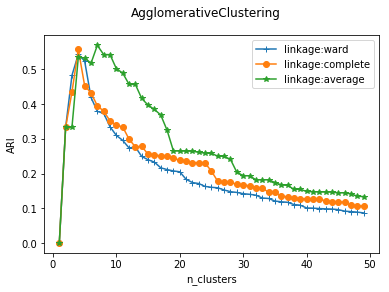

In [9]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

from sklearn import warnings
warnings.filterwarnings('ignore')


"""
    产生数据
"""
def create_data(centers,num=100,std=0.7):
    X,labels_true = make_blobs(n_samples=num,centers=centers, cluster_std=std)
    return X,labels_true

"""
    数据作图
"""
def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbycm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label),
        color=colors[i%len(colors)]

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()
    
"""
    测试函数
"""  
def test_AgglomerativeClustering(*data):
    X,labels_true=data
    clst=cluster.AgglomerativeClustering()
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true, predicted_labels))

"""
    考察簇的数量对于聚类效果的影响
"""
def test_AgglomerativeClustering_nclusters(*data):
    X,labels_true=data
    nums=range(1,50)
    ARIS=[]
    for num in nums:
        clst=cluster.AgglomerativeClustering(n_clusters=num)
        predicted_lables=clst.fit_predict(X)
        ARIS.append(adjusted_rand_score(labels_true, predicted_lables)) 

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(nums,ARIS,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    fig.suptitle("AgglomerativeClustering")
    plt.show()   

"""
    考察链接方式对聚类结果的影响
"""   
def test_agglomerativeClustering_linkage(*data):
    X,labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    linkages=['ward','complete','average']
    markers="+o*"
    for i,linkage in enumerate(linkages): 
        ARIs=[]
        for num in nums:
            clst=cluster.AgglomerativeClustering(n_clusters=num,linkage=linkage)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="linkage:%s"%linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_AgglomerativeClustering(X,labels_true)
plot_data(X,labels_true)
test_AgglomerativeClustering_nclusters(X,labels_true)
test_agglomerativeClustering_linkage(X,labels_true)

## Example Show different parameters 


    考察链接方式对聚类结果的影响



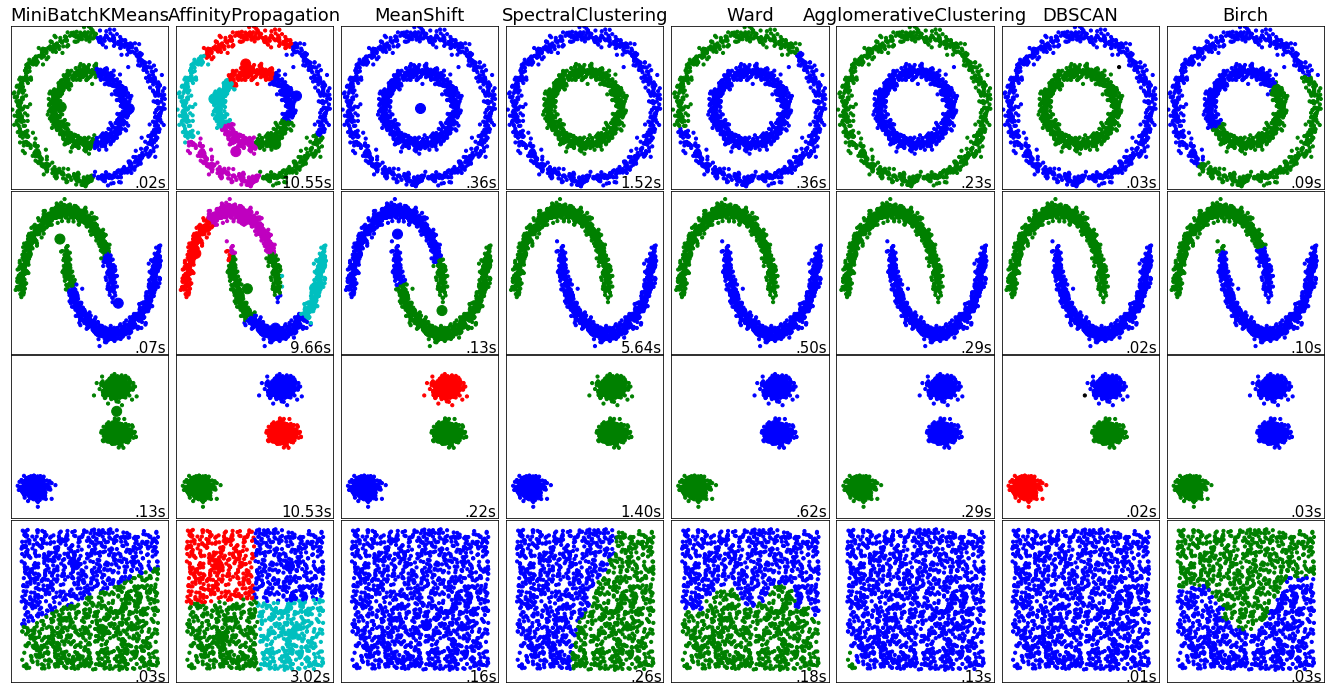

In [8]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
        
plt.show()